## Connect to git ##

In [1]:
!git clone https://github.com/Sharonnae/FitnessAI.git

Cloning into 'FitnessAI'...
remote: Enumerating objects: 5325, done.
remote: Counting objects: 100% (1730/1730), done.
remote: Compressing objects: 100% (1519/1519), done.
remote: Total 5325 (delta 223), reused 1670 (delta 208), pack-reused 3595
Receiving objects: 100% (5325/5325), 292.02 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (342/342), done.
Updating files: 100% (1912/1912), done.


## Checkout to the relevant branch ##

In [2]:
%cd /content/FitnessAI
!git checkout CNN---Accuracy

/content/FitnessAI
Branch 'CNN---Accuracy' set up to track remote branch 'CNN---Accuracy' from 'origin'.
Switched to a new branch 'CNN---Accuracy'


# Imports #

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

from PIL import Image

In [2]:
! rm -rf '/content/FitnessAI/CNN - Accuracy/deadlift/.ipynb_checkpoints'

'rm' is not recognized as an internal or external command,
operable program or batch file.


# Load Dataset

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        transforms.Resize((128,128))
     ])

dataset = torchvision.datasets.ImageFolder(r'/Users/rotemcohen/FitnessAI/CNN - Accuracy/squats', transform=transform)

# Split the data into Train set and Test set

In [3]:
dataset_train, dataset_test = random_split(dataset, (0.8, 0.2))
len(dataset_train), len(dataset_test)

batch_size = 2

trainloader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# Print a single image and label

/Users/rotemcohen/opt/anaconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


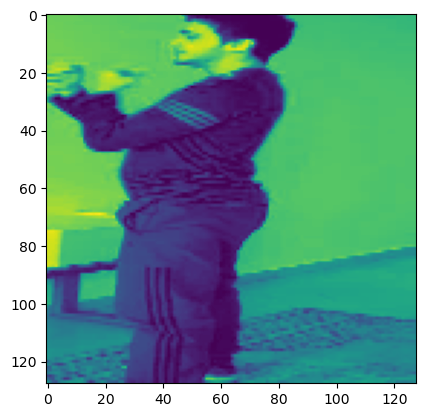

In [4]:
import matplotlib.pyplot as plt
for i in dataset:
  plt.imshow(i[0][0].numpy())
  break
# Print a single image and label

# Print a batch of images and labels from the train set

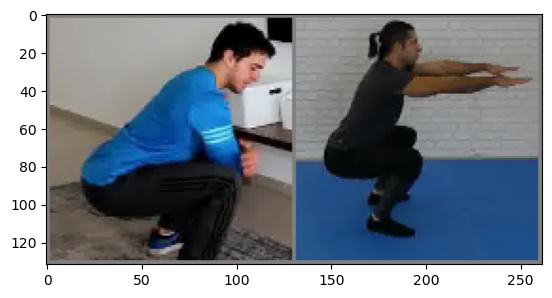

incorrect incorrect


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
classes = {
    0: 'correct',
    1: 'incorrect',
}

# A function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j].item()]:5s}' for j in range(batch_size)))


# Use a GPU if it is available, and the CPU otherwise

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# CNN Model

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(13456, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)


net = Net().to(device)


# Train

In [9]:
#Runtime - 2:21 Seconds
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

EPOCHS = 10

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = torch.flatten(outputs)
        
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,    20] loss: 0.000
[1,    40] loss: 0.000
[1,    60] loss: 0.002
[1,    80] loss: 0.000
[1,   100] loss: 0.002
[1,   120] loss: 0.002
[1,   140] loss: 0.002
[1,   160] loss: 0.001
[1,   180] loss: 0.000
[1,   200] loss: 0.002
[1,   220] loss: 0.000
[1,   240] loss: 0.000
[2,    20] loss: 0.000
[2,    40] loss: 0.000
[2,    60] loss: 0.000
[2,    80] loss: 0.001
[2,   100] loss: 0.003
[2,   120] loss: 0.001
[2,   140] loss: 0.000
[2,   160] loss: 0.001
[2,   180] loss: 0.000
[2,   200] loss: 0.001
[2,   220] loss: 0.000
[2,   240] loss: 0.002
[3,    20] loss: 0.000
[3,    40] loss: 0.001
[3,    60] loss: 0.001
[3,    80] loss: 0.000
[3,   100] loss: 0.000
[3,   120] loss: 0.001
[3,   140] loss: 0.000
[3,   160] loss: 0.001
[3,   180] loss: 0.000
[3,   200] loss: 0.001
[3,   220] loss: 0.000
[3,   240] loss: 0.000
[4,    20] loss: 0.000
[4,    40] loss: 0.000
[4,    60] loss: 0.000
[4,    80] loss: 0.001
[4,   100] loss: 0.000
[4,   120] loss: 0.000
[4,   140] loss: 0.000
[4,   160] 

# Test

In [11]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy {100 * correct // total} %')

Accuracy 38 %
